In [79]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2
from shutil import copyfile

In [80]:
image_dir = Path('content/Hindi Dataset')

In [81]:
dir_list = list(image_dir.glob('*.jpg')) 

In [82]:
image_count = len(dir_list)
image_count

672

In [83]:
name_list = []

for i in dir_list:
    name_list.append(os.path.basename(i).split(" ")[0])

In [84]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    print(I)
    images.append(I)


[[[231 230 234]
  [230 229 233]
  [232 231 235]
  ...
  [230 229 233]
  [229 228 232]
  [228 227 231]]

 [[232 231 235]
  [231 230 234]
  [233 232 236]
  ...
  [230 229 233]
  [229 228 232]
  [229 228 232]]

 [[230 229 233]
  [231 230 234]
  [234 233 237]
  ...
  [231 230 234]
  [230 229 233]
  [230 229 233]]

 ...

 [[237 229 236]
  [236 228 235]
  [236 229 236]
  ...
  [233 232 234]
  [232 231 233]
  [231 230 232]]

 [[236 228 235]
  [236 228 235]
  [235 228 235]
  ...
  [233 232 234]
  [232 231 233]
  [231 230 232]]

 [[240 232 239]
  [239 231 238]
  [237 230 237]
  ...
  [233 232 234]
  [232 231 233]
  [231 230 232]]]
[[[  2   2   2]
  [  2   2   2]
  [  0   0   0]
  ...
  [232 232 232]
  [249 249 249]
  [253 253 253]]

 [[  4   4   4]
  [  3   3   3]
  [  0   0   0]
  ...
  [232 232 232]
  [249 249 249]
  [253 253 253]]

 [[  0   0   0]
  [  0   0   0]
  [  3   3   3]
  ...
  [232 232 232]
  [249 249 249]
  [253 253 253]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

[[[203 205 205]
  [218 220 220]
  [217 219 219]
  ...
  [220 220 220]
  [219 219 219]
  [216 216 216]]

 [[235 237 237]
  [251 253 253]
  [251 253 253]
  ...
  [254 254 254]
  [252 252 252]
  [249 249 249]]

 [[232 234 234]
  [249 251 251]
  [250 252 252]
  ...
  [252 252 252]
  [250 250 250]
  [247 247 247]]

 ...

 [[236 236 236]
  [254 254 254]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [250 250 250]]

 [[236 236 236]
  [254 254 254]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [250 250 250]]

 [[236 236 236]
  [254 254 254]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [250 250 250]]]
[[[120 119 123]
  [226 225 229]
  [229 228 232]
  ...
  [235 231 236]
  [235 231 236]
  [234 230 235]]

 [[131 130 134]
  [223 222 226]
  [233 232 236]
  ...
  [233 229 234]
  [233 229 234]
  [233 229 234]]

 [[127 126 130]
  [214 213 217]
  [226 225 229]
  ...
  [233 229 234]
  [233 229 234]
  [233 229 234]]

 ...

 [[125 121 126]
  [227 223 228]
  [234 230 235]
  ..

[[[249 247 246]
  [255 254 253]
  [247 245 244]
  ...
  [255 253 252]
  [252 250 249]
  [249 247 246]]

 [[254 252 251]
  [253 251 250]
  [246 244 243]
  ...
  [250 248 247]
  [250 248 247]
  [248 246 245]]

 [[250 248 247]
  [252 250 249]
  [252 250 249]
  ...
  [248 246 245]
  [250 248 247]
  [249 247 246]]

 ...

 [[250 248 247]
  [252 250 249]
  [251 249 248]
  ...
  [252 250 249]
  [251 249 248]
  [250 248 247]]

 [[249 247 246]
  [254 252 251]
  [249 247 246]
  ...
  [249 247 246]
  [252 250 249]
  [251 249 248]]

 [[250 248 247]
  [254 252 251]
  [248 246 245]
  ...
  [250 248 247]
  [253 251 250]
  [251 249 248]]]
[[[252 252 252]
  [255 255 255]
  [254 254 254]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[255 255 255]
  [254 254 254]
  [252 252 252]
  ...
  [253 253 253]
  [252 252 252]
  [252 252 252]]

 [[251 251 251]
  [250 250 250]
  [252 252 252]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ..

[[[113 113 113]
  [  1   1   1]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[ 52  52  52]
  [  2   2   2]
  [  2   2   2]
  ...
  [  0   0   0]
  [  3   3   3]
  [106 106 106]]

 [[ 57  57  57]
  [  0   0   0]
  [  0   0   0]
  ...
  [  4   4   4]
  [  0   0   0]
  [126 126 126]]

 ...

 [[231 231 231]
  [ 41  41  41]
  [  0   0   0]
  ...
  [194 194 194]
  [198 198 198]
  [218 218 218]]

 [[198 198 198]
  [  0   0   0]
  [  4   4   4]
  ...
  [196 196 196]
  [194 194 194]
  [198 198 198]]

 [[163 163 163]
  [  5   5   5]
  [  3   3   3]
  ...
  [196 196 196]
  [196 196 196]
  [195 195 195]]]
[[[254 254 254]
  [ 34  34  34]
  [  0   0   0]
  ...
  [ 20  20  20]
  [247 247 247]
  [252 252 252]]

 [[215 215 215]
  [ 10  10  10]
  [  0   0   0]
  ...
  [ 15  15  15]
  [203 203 203]
  [255 255 255]]

 [[207 207 207]
  [ 15  15  15]
  [  0   0   0]
  ...
  [  0   0   0]
  [205 205 205]
  [255 255 255]]

 ...

 [[255 255 255]
  [ 49  49  49]
  [  1   1   1]
  ..

[[[119 119 119]
  [193 193 193]
  [255 255 255]
  ...
  [251 251 251]
  [181 181 181]
  [104 104 104]]

 [[145 145 145]
  [255 255 255]
  [246 246 246]
  ...
  [253 253 253]
  [254 254 254]
  [140 140 140]]

 [[214 214 214]
  [253 253 253]
  [248 248 248]
  ...
  [254 254 254]
  [255 255 255]
  [233 233 233]]

 ...

 [[200 200 200]
  [255 255 255]
  [249 249 249]
  ...
  [248 248 248]
  [255 255 255]
  [251 251 251]]

 [[170 170 170]
  [255 255 255]
  [248 248 248]
  ...
  [255 255 255]
  [255 255 255]
  [227 227 227]]

 [[127 127 127]
  [250 250 250]
  [255 255 255]
  ...
  [255 255 255]
  [250 250 250]
  [167 167 167]]]
[[[116 116 116]
  [ 96  96  96]
  [164 164 164]
  ...
  [168 168 168]
  [255 255 255]
  [251 251 251]]

 [[225 225 225]
  [251 251 251]
  [128 128 128]
  ...
  [131 131 131]
  [159 159 159]
  [255 255 255]]

 [[255 255 255]
  [250 250 250]
  [255 255 255]
  ...
  [255 255 255]
  [136 136 136]
  [236 236 236]]

 ...

 [[243 243 243]
  [251 251 251]
  [255 255 255]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  6   6   6]
  [  0   0   0]
  [  2   2   2]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  2   2   2]
  [  3   3   3]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 252 252]
  [255 255 255]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]

 [[251 251 251]
  [252 252 252]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [252 252 252]]

 [[255 255 255]
  [253 253 253]
  [241 241 241]
  ...
  [255 255 255]
  [254 254 254]
  [253 253 253]]

 ...

 [[247 247 247]
  [255 255 255]
  [255 255 255]
  ..

In [85]:
images_list = np.array(images)
name_list = np.array(name_list).T
print(name_list)
print(images_list)

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'adashtop' 'adashtop'
 'adashtop' 'adashtop' 'adashtop' 'adashtop' 'adashtop' 'adashtop'
 'adashtop' 'adashtop' 'adashtop' 'adashtop' 'ai' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'ai' 'au' 'au' 'au' 'au' 'au' 'au' 'au' 'au'
 'au' 'au' 'au' 'au' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'bh'
 'bh' 'bh' 'bh' 'bh' 'bh' 'bh' 'bh' 'bh' 'bh' 'bh' 'bh' 'c' 'c' 'c' 'c'
 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'ch' 'ch' 'ch' 'ch' 'ch' 'ch' 'ch' 'ch'
 'ch' 'ch' 'ch' 'ch' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd'
 'ddotdown' 'ddotdown' 'ddotdown' 'ddotdown' 'ddotdown' 'ddotdown'
 'ddotdown' 'ddotdown' 'ddotdown' 'ddotdown' 'ddotdown' 'ddotdown'
 'ddotdownh' 'ddotdownh' 'ddotdownh' 'ddotdownh' 'ddotdownh' 'ddotdownh'
 'ddotdownh' 'ddotdownh' 'ddotdownh' 'ddotdownh' 'ddotdownh' 'ddotdownh'
 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'dh' 'e' 'e' 'e'
 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'edashtop' 'edashtop' 'edashtop'
 'eda

In [86]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)
print(name_list)
#covert image to 0 to 255 (pixel information)
print(images_list)
images_list = images_list / 255.0 

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19
 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 21 21
 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27

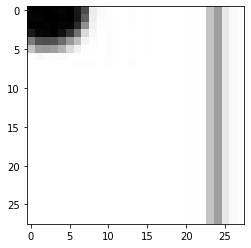

In [87]:
plt.imshow(images_list[1])

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_list,name_list, test_size=0.3, random_state=42)
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024, activation="relu"),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=56, activation="softmax") #output layer
])

In [92]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [93]:
from keras.callbacks import EarlyStopping
es1 = EarlyStopping(patience=30, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge
history = model.fit(x=X_train,y=y_train,epochs=200,validation_split=0.3,callbacks=[es1, es2])

Epoch 1/200
11/11 [==============================] - 6s 220ms/step - loss: 0.0930 - sparse_categorical_accuracy: 0.9818 - val_loss: 1.3105 - val_sparse_categorical_accuracy: 0.7730
Epoch 2/200
11/11 [==============================] - 2s 168ms/step - loss: 0.4728 - sparse_categorical_accuracy: 0.9331 - val_loss: 0.8861 - val_sparse_categorical_accuracy: 0.8582
Epoch 3/200
11/11 [==============================] - 2s 176ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.9573 - val_sparse_categorical_accuracy: 0.8227
Epoch 4/200
11/11 [==============================] - 2s 169ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.8051 - val_sparse_categorical_accuracy: 0.8652
Epoch 5/200
11/11 [==============================] - 2s 168ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.7824 - val_sparse_categorical_accuracy: 0.8582
Epoch 6/200
11/11 [==============================] - 2s 175ms/step - loss: 0.0253 - sparse_cate

In [94]:
score=model.evaluate(X_test, y_test)
print("Test lost: ",score[0])
print("Test Accuracy: ",score[1])

7/7 [==============================] - 0s 43ms/step - loss: 0.4574 - sparse_categorical_accuracy: 0.9356
Test lost:  0.45741623640060425
Test Accuracy:  0.9356435537338257


[[[252. 252. 252.]
  [252. 252. 252.]
  [251. 251. 251.]
  ...
  [158. 158. 158.]
  [255. 255. 255.]
  [247. 247. 247.]]

 [[253. 253. 253.]
  [255. 255. 255.]
  [251. 251. 251.]
  ...
  [206. 206. 206.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [247. 247. 247.]
  [248. 248. 248.]
  ...
  [235. 235. 235.]
  [251. 251. 251.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [245. 245. 245.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [254. 254. 254.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 255. 255.]]]
(28, 28, 3)
1/1 [==============================] - 0s 51ms/step
[8]


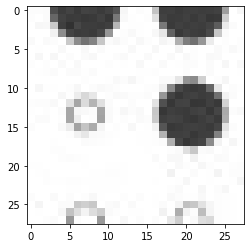

In [121]:
from tensorflow.keras.preprocessing import image
img=image.load_img('content/d (Custom).jpg',target_size=(28, 28,3))

plt.imshow(img)

x=image.img_to_array(img)
print(x)

print(x.shape)

x=np.expand_dims(x,axis=0)
model.predict(x)

a=np.argmax(model.predict(x), axis=1)
print(a)

In [122]:
if a==[0]:
  print('अ')
elif a==[1]:
  print('आ')
elif a==[2]:
  print('ऐ')
elif a==[3]:
  print('औ') 
elif a==[4]:
  print('ब')
elif a==[5]:
  print('भ')
elif a==[6]:
  print('च')
elif a==[7]:
  print('छ')
elif a==[8]:
  print('द')
elif a==[9]:
  print('ड')
elif a==[10]:
  print('ढ')
elif a==[11]:
  print('ध')
elif a==[12]:
  print('ऎ')
elif a==[13]:
  print('ए')
elif a==[14]:
  print('फ़')
elif a==[15]:
  print('ग')
elif a==[16]:
  print('घ')
elif a==[17]:
  print('ह')
elif a==[18]:
  print('इ')
elif a==[19]:
  print('ई')
elif a==[20]:
  print('ज')  
elif a==[21]:
  print('झ')
elif a==[22]:
  print('ज्ञ')
elif a==[23]:
  print('क')
elif a==[24]:
  print('ख')
elif a==[25]:
  print('ल')
elif a==[26]:
  print('ळ')
elif a==[27]:
  print('ऌ')
elif a==[28]:
  print('ॡ')
elif a==[29]:
  print('म')
elif a==[30]:
  print('न')
elif a==[31]:
  print('ञ')
elif a==[32]:
  print('ण')
elif a==[33]:
  print('ङ')
elif a==[34]:
  print('ऒ')
elif a==[35]:
  print('ओ')
elif a==[36]:
  print('प')
elif a==[37]:
  print('फ')
elif a==[38]:
  print('र')
elif a==[39]:
  print('ड़')
elif a==[40]:
  print('ऋ')
elif a==[41]:
  print('ॠ')
elif a==[42]:
  print('ढ़')
elif a==[43]:
  print('स')
elif a==[44]:
  print('श')
elif a==[45]:
  print('ष')
elif a==[46]:
  print('क्ष')
elif a==[47]:
  print('त')
elif a==[48]:
  print('ट')
elif a==[49]:
  print('ठ')
elif a==[50]:
  print('थ')
elif a==[51]:
  print('उ') 
elif a==[52]:
  print('ऊ')
elif a==[53]:
  print('व')
elif a==[54]:
  print('य') 
elif a==[55]:
  print('ज़')

द


In [97]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
keras_file="HindiModel.h5"
tf.keras.models.save_model(model,keras_file)